In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Importamos datos

In [64]:
df_house_price = pd.read_csv('/home/ivan/Documentos/IvanDeveloper/CienciaDeDatos/8_Ejercicios/30032023/archive/realest.csv')

In [65]:
df_house_price.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [66]:
df_house_price = df_house_price.dropna()

In [67]:
df_house_price.shape

(128, 9)

In [68]:
df_house_price.columns

Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')

### HeatMap

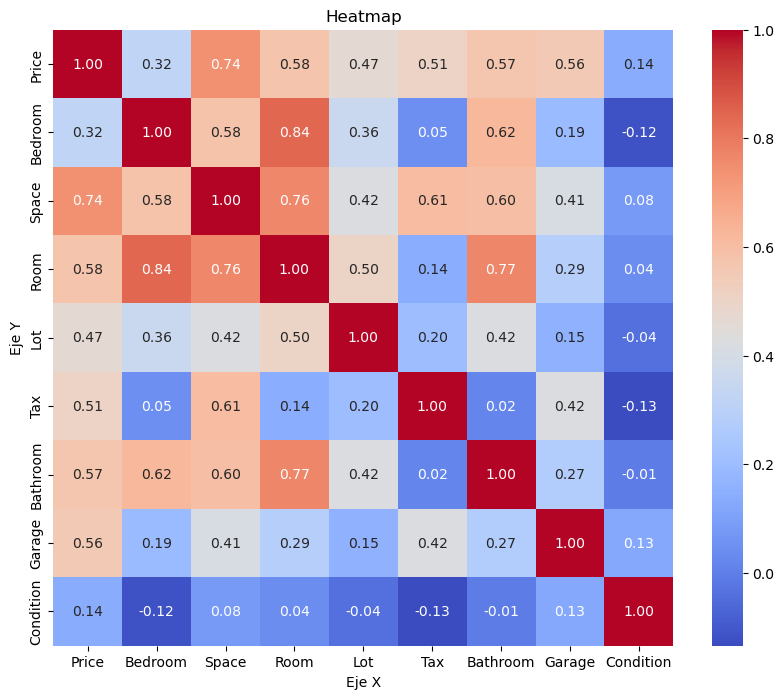

In [69]:
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(df_house_price[['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage','Condition']].corr(), cmap='coolwarm', annot=True, fmt=".2f")  # cmap define el esquema de colores, annot agrega los valores en cada celda, fmt define el formato de los valores
plt.title('Heatmap')  # Título del heatmap
plt.xlabel('Eje X')  # Etiqueta del eje X
plt.ylabel('Eje Y')  # Etiqueta del eje Y
plt.show()


### Utilizaremos las columnas Space y Price

In [70]:
df_house = df_house_price[['Space','Price']]

In [71]:
# Suponiendo que 'df_house_price' es el DataFrame que contiene los datos
# y 'Space' es la variable independiente y 'Price' la variable dependiente
X = df_house_price[['Space']]  # Variable independiente (features)
y = df_house_price['Price']     # Variable dependiente (target)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo_regresion = LinearRegression(fit_intercept=True)

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
predicciones = modelo_regresion.predict(X_test)

# Crear un DataFrame para comparar los datos reales con las predicciones
comparacion = pd.DataFrame({'Real': y_test, 'Predicción': predicciones})

# Imprimir las primeras filas del DataFrame de comparación
print(comparacion.head())

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predicciones)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, predicciones)

# Imprimir los resultados
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de determinación R^2:", r2)


     Real  Predicción
63   45.0   46.299450
45   35.0   57.375778
23   46.0   48.569999
36   88.0   79.804848
113  81.0   77.672507
Error Cuadrático Medio (MSE): 75.3995183567526
Coeficiente de determinación R^2: 0.6064694687371468


In [72]:
# Obtener los coeficientes de la regresión lineal
pendiente = modelo_regresion.coef_[0]
intercepto = modelo_regresion.intercept_
predicciones = modelo_regresion.predict(X)

print("La pendiente es: ", pendiente)
print("El intercepto es: ", intercepto)

La pendiente es:  0.019743899839624813
El intercepto es:  34.8282442874862


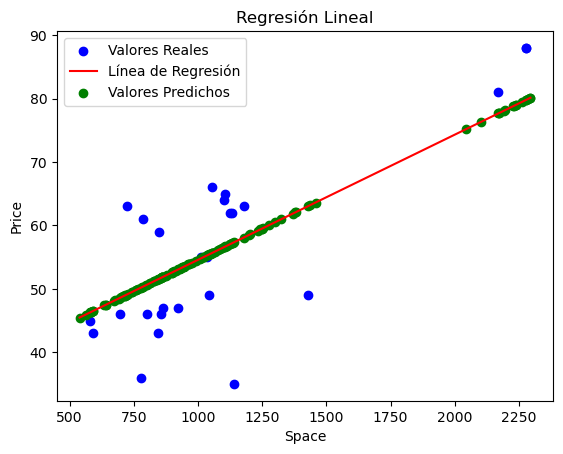

In [73]:

# Crear un gráfico de dispersión para los datos reales
plt.scatter(X_test, y_test, color='blue', label='Valores Reales')

# Crear una línea recta para la función de regresión
x_values = np.linspace(X.min(), X.max(), 100)
y_values = pendiente * x_values + intercepto
plt.plot(x_values, y_values, color='red', label='Línea de Regresión')

# Agregar los valores predichos al gráfico
plt.scatter(X, predicciones, color='green', label='Valores Predichos')

# Etiquetas y título del gráfico
plt.title('Regresión Lineal')
plt.xlabel('Space')
plt.ylabel('Price')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

### Predecir

In [74]:
# Solicitar al usuario que ingrese un valor para 'Space'
valor_space = float(input("Ingresa un valor para Space: "))

# Realizar la predicción para el valor ingresado por el usuario
prediccion = modelo_regresion.predict([[valor_space]])

# Imprimir la predicción
print("La predicción para Space =", valor_space, "es:", prediccion[0])

La predicción para Space = 50.0 es: 35.81543927946744


/home/ivan/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
